In [107]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import numpy as np
df = pd.read_excel(r"D:\PythonFiles\Trajectory_ReClassfication\Pecos_All_labeled_processed.xlsx")
new_data = pd.read_excel(r"D:\PythonFiles\Trajectory_ReClassfication\Test_LabeledTraj_McCarran_Keystone_processed.xlsx")


In [108]:
# 将特定列的数据类型转换为 float64
data_extended = df
data_test = new_data
# data_test['Labeled_Class'] = data_test['Labeled_Class'].astype('float64')
# data_test['AdjSpeed'] = data_test['AdjSpeed'].astype('float64')
# data_test['Max_AdjSpeed'] = data_test['Max_AdjSpeed'].astype('float64')

# # 检查转换后的数据类型
print(data_test[['Labeled_Class', 'AdjSpeed', 'Max_AdjSpeed']].dtypes)

#
merged_df = pd.merge(data_extended, data_test,  how='inner')  # inner join

Labeled_Class      int64
AdjSpeed         float64
Max_AdjSpeed     float64
dtype: object


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\reshape\merge.py:1207: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


In [110]:
merged_df

,ObjectID,FrameIndex,Point_Cnt,Height,Length,Width,Area,Dis,Max_Length,AdjSpeed,...,Max_Width,Max_Area,90thP_Height,90thP_Width,90thP_Area,90thP_Length,OBJECTID *,Longitude,Latitude,Elevation


In [111]:
class_mapping_integer = {
    '1': 'Vehicle',
    '2': 'Pedestrian(s)',
    '3': 'Bicyclist',
    '4': 'E-Scooter/E-Skateboarder',
    '5': 'Pedestrian(s)',
    '6': 'Motorcyclist',
    '7': 'Pedestrian(s)',
    '8': 'Pedestrian(s)',
    '9': 'Truck'
}
class_mapping = {
    '1.0': 'Vehicle',
    '2.0': 'Pedestrian',
    '3.0': 'Bicyclist',
    '4.0': 'E-Scooter/E-Skateboarder',
    '5.0': 'Wheelchair',
    '6.0': 'Motorcyclist',
    '7.2': 'Pedestrian Group of 2',
    '8.0': 'Pedestrian with Trolley/Cart/Baby',
    '9.0': 'Truck'
}
# 创建一个映射字典
class_mapping_new = {
    '1.0': 'Vehicle',
    '2.0': 'Pedestrian(s)',
    '3.0': 'Bicyclist',
    '4.0': 'E-Scooter/E-Skateboarder',
    '5.0': 'Pedestrian(s)',
    '6.0': 'Motorcyclist',
    '7.2': 'Pedestrian(s)',
    '8.0': 'Pedestrian(s)',
    '9.0': 'Truck'
}

In [112]:
data_extended['Labeled_Class'] = data_extended['Labeled_Class'].astype(str)
data_test['Labeled_Class'] = data_test['Labeled_Class'].astype(str)
data_extended['Labeled_Class_Name'] = data_extended['Labeled_Class'].map(class_mapping_new)
data_test['Labeled_Class_Name'] = data_test['Labeled_Class'].map(class_mapping_integer)

In [113]:
data_test

,OBJECTID *,ObjectID,FrameIndex,Longitude,Latitude,Elevation,Point_Cnt,Height,Length,Width,...,Max_Acceleration,Max_Deceleration,Max_Height,Max_Width,Max_Area,90thP_Height,90thP_Width,90thP_Area,90thP_Length,Labeled_Class_Name
0,4053,10524,11438,-119.843962,39.549698,1368.844843,24,0.049024,0.228332,0.078318,...,6.209589,6.849043,1.600484,0.80724,1.217088,1.449409,0.622856,0.669639,1.193000,Bicyclist
1,4054,10524,11439,-119.843964,39.549698,1368.844711,40,0.057476,0.403178,0.069598,...,6.209589,6.849043,1.600484,0.80724,1.217088,1.449409,0.622856,0.669639,1.193000,Bicyclist
2,4055,10524,11440,-119.843967,39.549697,1368.844707,43,0.133547,0.544237,0.238413,...,6.209589,6.849043,1.600484,0.80724,1.217088,1.449409,0.622856,0.669639,1.193000,Bicyclist
3,4056,10524,11441,-119.843973,39.549697,1368.844922,46,0.287380,0.753063,0.309707,...,6.209589,6.849043,1.600484,0.80724,1.217088,1.449409,0.622856,0.669639,1.193000,Bicyclist
4,4057,10524,11442,-119.843972,39.549697,1368.845223,29,0.065928,0.337768,0.122985,...,6.209589,6.849043,1.600484,0.80724,1.217088,1.449409,0.622856,0.669639,1.193000,Bicyclist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,967092,648,1513,-119.843985,39.550217,1369.081208,6,0.693143,0.415399,0.172349,...,7.998310,3.920031,1.542682,0.60333,0.816740,1.422160,0.412622,0.238329,0.615172,Pedestrian(s)
9650,967093,648,1514,-119.843986,39.550219,1369.082436,7,0.693260,0.416587,0.052002,...,7.998310,3.920031,1.542682,0.60333,0.816740,1.422160,0.412622,0.238329,0.615172,Pedestrian(s)
9651,967094,648,1516,-119.843989,39.550223,1369.084510,5,0.704571,0.418957,0.320840,...,7.998310,3.920031,1.542682,0.60333,0.816740,1.422160,0.412622,0.238329,0.615172,Pedestrian(s)
9652,967095,648,1517,-119.843987,39.550225,1369.084994,6,0.706852,0.364788,0.210641,...,7.998310,3.920031,1.542682,0.60333,0.816740,1.422160,0.412622,0.238329,0.615172,Pedestrian(s)


In [114]:
# 假设 data_extended 是您的完整训练数据集
# 假设 data_test 是您的完整测试数据集
# 删除训练集中含有 NaN 的行
data_extended_clean = data_extended.dropna()

# 删除测试集中含有 NaN 的行
data_test_clean = data_test.dropna()

In [104]:
data_extended

,ObjectID,FrameIndex,Point_Cnt,Height,Length,Width,Area,Dis,Max_Length,AdjSpeed,...,Max_Acceleration,Max_Deceleration,Max_Height,Max_Width,Max_Area,90thP_Height,90thP_Width,90thP_Area,90thP_Length,Labeled_Class_Name
0,413,273,5,0.898270,0.542062,0.251864,0.136526,51.460000,1.588952,1.330297,...,7.582738,1.430985,1.639741,0.946914,2.044746,1.474646,0.534169,0.820364,1.651618,Motorcyclist
1,413,274,5,1.484106,0.600660,0.141191,0.084808,51.173600,1.588952,5.511890,...,7.582738,1.430985,1.639741,0.946914,2.044746,1.474646,0.534169,0.820364,1.651618,Motorcyclist
2,413,275,5,1.181954,0.464419,0.209014,0.097070,50.973600,1.588952,3.431394,...,7.582738,1.430985,1.639741,0.946914,2.044746,1.474646,0.534169,0.820364,1.651618,Motorcyclist
3,413,276,8,1.474662,0.763459,0.371526,0.283645,50.788000,1.588952,9.843627,...,7.582738,1.430985,1.639741,0.946914,2.044746,1.474646,0.534169,0.820364,1.651618,Motorcyclist
4,413,277,13,1.469057,0.532972,0.490115,0.261218,50.617846,1.588952,1.975724,...,7.582738,1.430985,1.639741,0.946914,2.044746,1.474646,0.534169,0.820364,1.651618,Motorcyclist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25145,12207,6828,8,0.757431,0.772462,0.449988,0.347599,27.584000,1.360091,12.353652,...,6.640366,4.826292,1.756148,0.828880,1.105602,1.524217,0.685929,0.902218,1.515786,Motorcyclist
25146,12207,6829,14,1.293839,0.708059,0.465457,0.329571,28.021714,1.360091,9.003163,...,6.640366,4.826292,1.756148,0.828880,1.105602,1.524217,0.685929,0.902218,1.515786,Motorcyclist
25147,12207,6831,8,1.230835,0.767978,0.298614,0.229329,28.651000,1.360091,10.822843,...,6.640366,4.826292,1.756148,0.828880,1.105602,1.524217,0.685929,0.902218,1.515786,Motorcyclist
25148,12207,6832,7,1.228325,0.842713,0.212843,0.179366,29.030857,1.360091,2.529576,...,6.640366,4.826292,1.756148,0.828880,1.105602,1.524217,0.685929,0.902218,1.515786,Motorcyclist


In [88]:
data_test

,OBJECTID *,ObjectID,FrameIndex,Longitude,Latitude,Elevation,Point_Cnt,Height,Length,Width,...,Max_Acceleration,Max_Deceleration,Max_Height,Max_Width,Max_Area,90thP_Height,90thP_Width,90thP_Area,90thP_Length,Labeled_Class_Name
0,4053,10524,11438,-119.843962,39.549698,1368.844843,24,0.049024,0.228332,0.078318,...,6.209589,6.849043,1.600484,0.80724,1.217088,1.449409,0.622856,0.669639,1.193000,Bicyclist
1,4054,10524,11439,-119.843964,39.549698,1368.844711,40,0.057476,0.403178,0.069598,...,6.209589,6.849043,1.600484,0.80724,1.217088,1.449409,0.622856,0.669639,1.193000,Bicyclist
2,4055,10524,11440,-119.843967,39.549697,1368.844707,43,0.133547,0.544237,0.238413,...,6.209589,6.849043,1.600484,0.80724,1.217088,1.449409,0.622856,0.669639,1.193000,Bicyclist
3,4056,10524,11441,-119.843973,39.549697,1368.844922,46,0.287380,0.753063,0.309707,...,6.209589,6.849043,1.600484,0.80724,1.217088,1.449409,0.622856,0.669639,1.193000,Bicyclist
4,4057,10524,11442,-119.843972,39.549697,1368.845223,29,0.065928,0.337768,0.122985,...,6.209589,6.849043,1.600484,0.80724,1.217088,1.449409,0.622856,0.669639,1.193000,Bicyclist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,967092,648,1513,-119.843985,39.550217,1369.081208,6,0.693143,0.415399,0.172349,...,7.998310,3.920031,1.542682,0.60333,0.816740,1.422160,0.412622,0.238329,0.615172,Pedestrian(s)
9650,967093,648,1514,-119.843986,39.550219,1369.082436,7,0.693260,0.416587,0.052002,...,7.998310,3.920031,1.542682,0.60333,0.816740,1.422160,0.412622,0.238329,0.615172,Pedestrian(s)
9651,967094,648,1516,-119.843989,39.550223,1369.084510,5,0.704571,0.418957,0.320840,...,7.998310,3.920031,1.542682,0.60333,0.816740,1.422160,0.412622,0.238329,0.615172,Pedestrian(s)
9652,967095,648,1517,-119.843987,39.550225,1369.084994,6,0.706852,0.364788,0.210641,...,7.998310,3.920031,1.542682,0.60333,0.816740,1.422160,0.412622,0.238329,0.615172,Pedestrian(s)


Accuracy: 0.2938767395626243
Classification Report:
                          precision    recall  f1-score   support

               Bicyclist       0.41      0.51      0.46      7571
E-Scooter/E-Skateboarder       0.18      0.02      0.04      4343
            Motorcyclist       0.00      0.00      0.00      3090
           Pedestrian(s)       0.23      0.56      0.32      3443
                 Vehicle       1.00      0.22      0.37      6703

                accuracy                           0.29     25150
               macro avg       0.36      0.26      0.24     25150
            weighted avg       0.45      0.29      0.29     25150



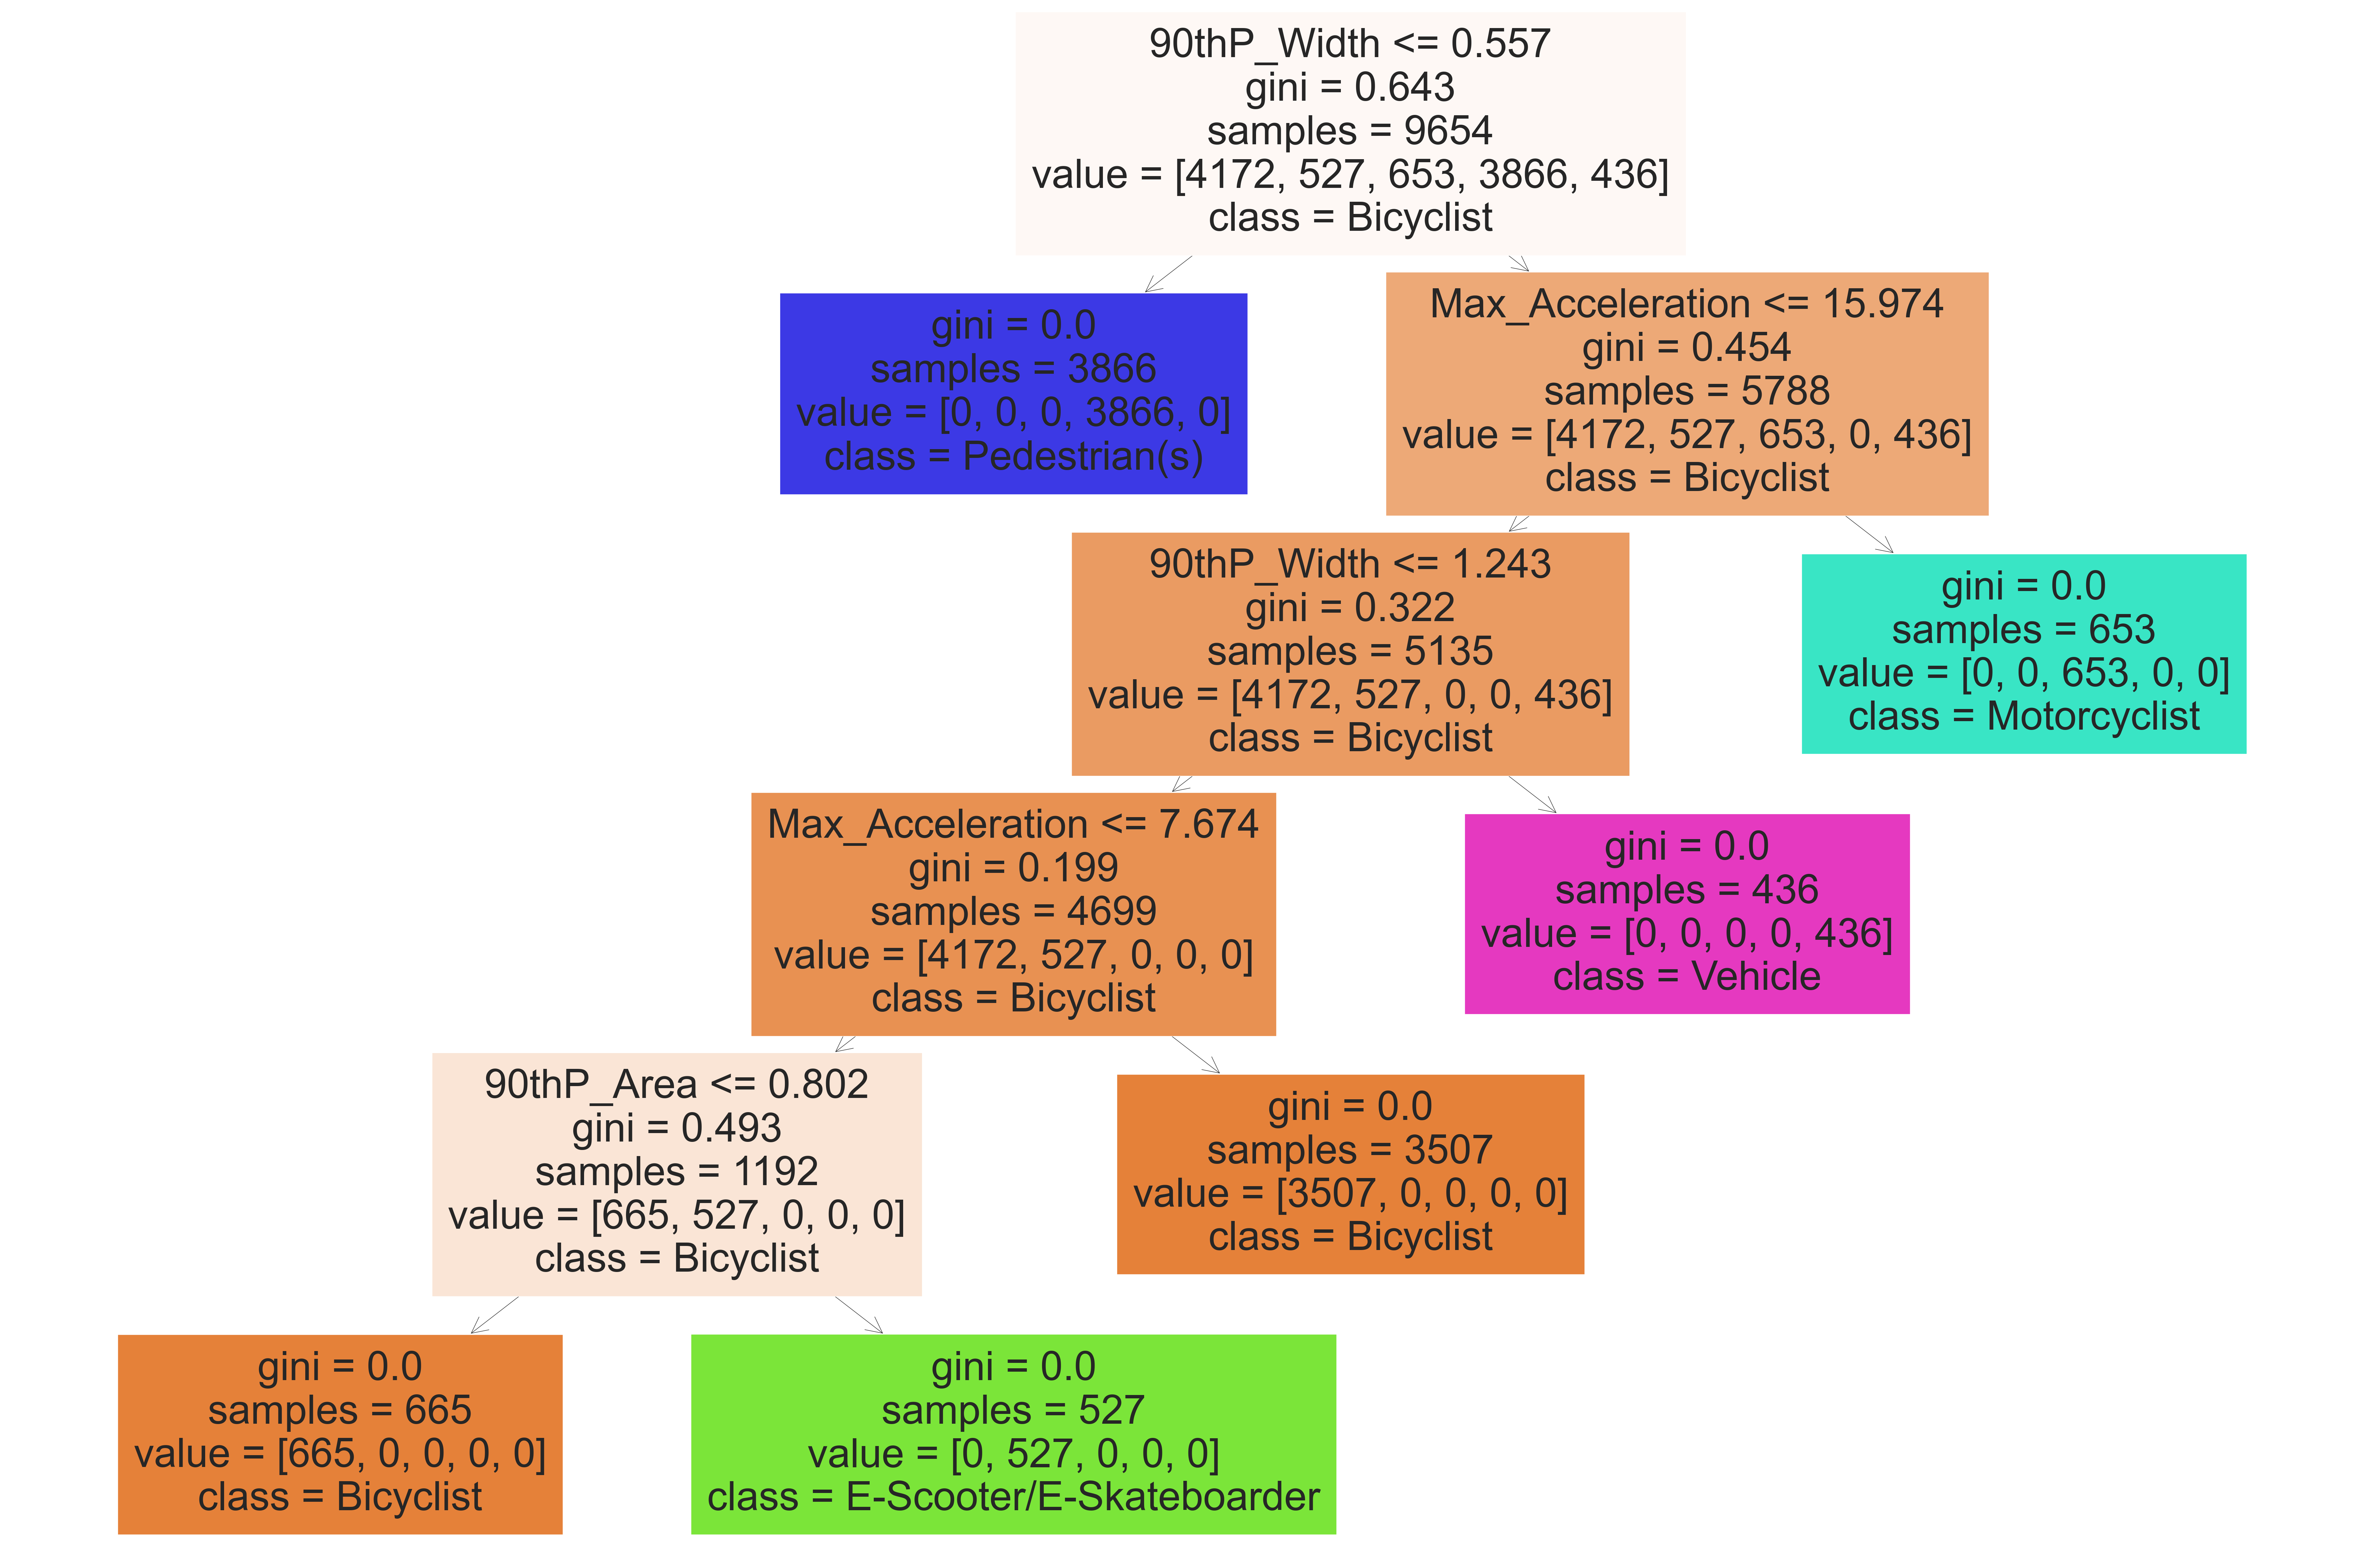

In [120]:

features_train = data_extended[['MedianSpeed', 'Max_Acceleration', 'Max_Deceleration', 'Height', 'Width', 'Length', '90thP_Length','90thP_Width','90thP_Area','90thP_Height', 'Length/Dis','Width/Dis', 'Height/Dis']]
target_train = data_test['Labeled_Class_Name']

features_test = data_extended[['MedianSpeed', 'Max_Acceleration', 'Max_Deceleration', 'Height', 'Width', 'Length', '90thP_Length','90thP_Width','90thP_Area','90thP_Height', 'Length/Dis','Width/Dis', 'Height/Dis']]
target_test = data_extended['Labeled_Class_Name']


# 创建决策树分类器
clf = DecisionTreeClassifier(min_samples_leaf=10, min_impurity_decrease=0.01)

# 训练模型
clf.fit(features_train, target_train)

# 预测测试集
y_pred = clf.predict(features_test)

# 评估模型
print("Accuracy:", accuracy_score(target_test, y_pred))
print("Classification Report:")
print(classification_report(target_test, y_pred))

# 绘制决策树
plt.figure(figsize=(90, 60))
plot_tree(clf, filled=True, feature_names=features_train.columns, class_names=clf.classes_)
plt.savefig('decision_tree_large.png', format='png', bbox_inches='tight')
plt.show()

